In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
import astropy.constants
import astroquery.vizier

/Users/Emily/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


In [2]:
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.facecolor']='whitesmoke'
mpl.rcParams['axes.edgecolor']='white'
mpl.rcParams['axes.linewidth']=3

mpl.rcParams['text.color'] = 'dimgrey'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['font.size']=14
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5

mpl.rcParams["text.usetex"] = True

In [3]:
#SLOOOOOW (quicker for larger cuts in Plx)
Vizier=astroquery.vizier.Vizier
v=Vizier(columns=['RA_ICRS', 'DE_ICRS','Plx', 'pmRA', 'pmDE', 'RV', 'eRV'],column_filters={"RV":"!=0","Plx":"!=0","Plx":">50","pmRA":"!=0","pmDE":"!=0"})
v.ROW_LIMIT = 100
gaiaCat=v.get_catalogs('I/345/gaia2')[0]

In [4]:
print(gaiaCat)

   RV       RA_ICRS         DE_ICRS        Plx        pmRA      pmDE  
 km / s       deg             deg          mas      mas / yr  mas / yr
------- --------------- --------------- ---------- --------- ---------
 -31.69  46.61308130078   1.96119240195    67.8892   389.125  -924.894
   4.81  50.84230648540  11.68640789129    58.4512  -251.039  -147.953
  25.23  39.02813547774   6.89313358099   138.2084  1777.432  1474.053
  10.85  41.57314716017  11.77432814454    61.9128   263.849  -211.596
  34.22  55.93923237926  16.66593330157    58.0070   156.215  -310.291
  34.18  55.96972731734  16.67066726282    58.1097   157.945  -316.326
  24.11  61.33520829696  22.00834244995    59.1895   171.867  -130.525
  35.70  56.58577328079  26.21466037092    69.4494   386.933  -196.426
  32.98  40.83910180284  19.42918797736    53.5579   455.659     2.846
   0.63  38.97325875236  20.21927976354    71.1607   249.929  -140.400
    ...             ...             ...        ...       ...       ...
  19.5

In [11]:
coord = astropy.coordinates.SkyCoord(ra=gaiaCat['RA_ICRS'], dec=gaiaCat['DE_ICRS'],
            distance=(1/gaiaCat['Plx'])*u.kpc, frame='icrs')

In [14]:
x=coord.galactic.cartesian.x
y=coord.galactic.cartesian.y
z=coord.galactic.cartesian.z

print(np.mean(x))
print(np.mean(y))
print(np.mean(z))

-0.0102971699128 kpc
0.00414346996044 kpc
0.00254090856656 kpc


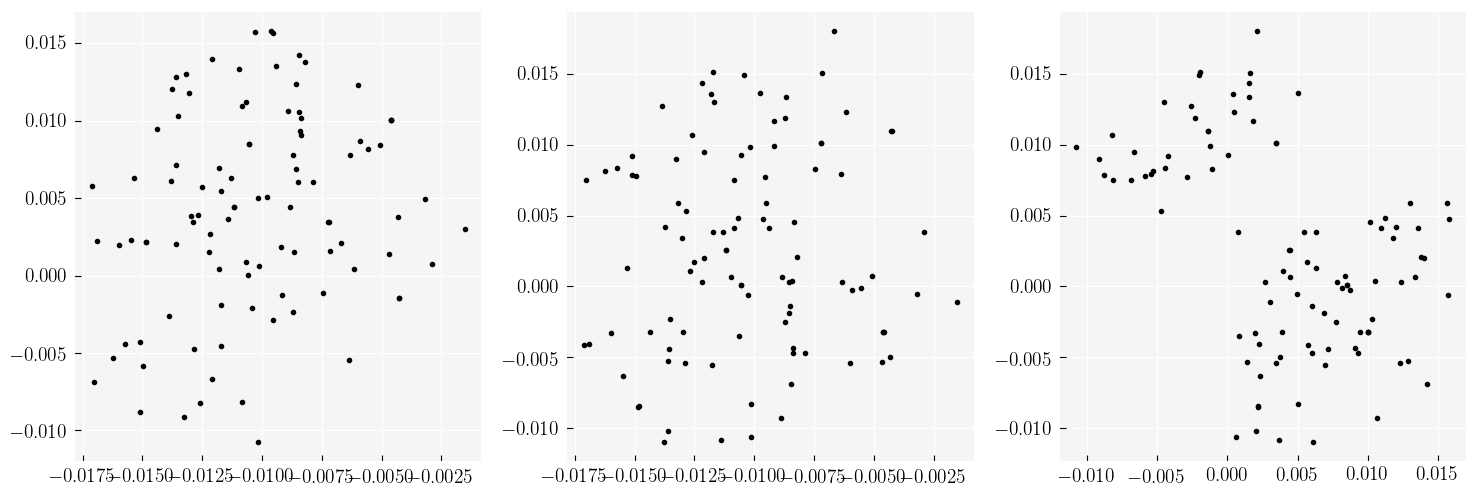

In [15]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(x,y, 'k.')
axes[1].plot(x,z, 'k.')
axes[2].plot(y,z, 'k.')
plt.show()